In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# Specify a path variable (project path)
proj_path = '/content/gdrive/MyDrive/'

Mounted at /content/gdrive


In [ ]:
df_train=pd.read_csv(proj_path+'loan-train.csv')
df_test=pd.read_csv(proj_path+'loan-test.csv')
#Removing unwanted column of loan_id
df_train=df_train.loc[:,df_train.columns!='Loan_ID']
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  --

In [ ]:
# This code generates descriptive statistics of the dataframe 'df_train'
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df_train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


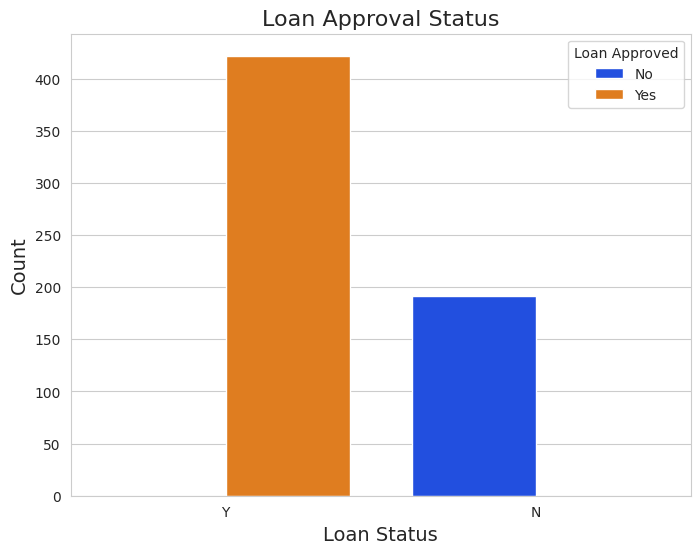

In [ ]:
# Convert Loan_Status column to binary variable
loan_st = df_train['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)

# Set plot style and figure size
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

# Countplot with hue
sns.countplot(x='Loan_Status', hue=loan_st, data=df_train, palette='bright')

# Set plot title and axes labels
plt.title('Loan Approval Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add legend
plt.legend(title='Loan Approved', labels=['No', 'Yes'], loc='upper right')

# Show plot
plt.show()


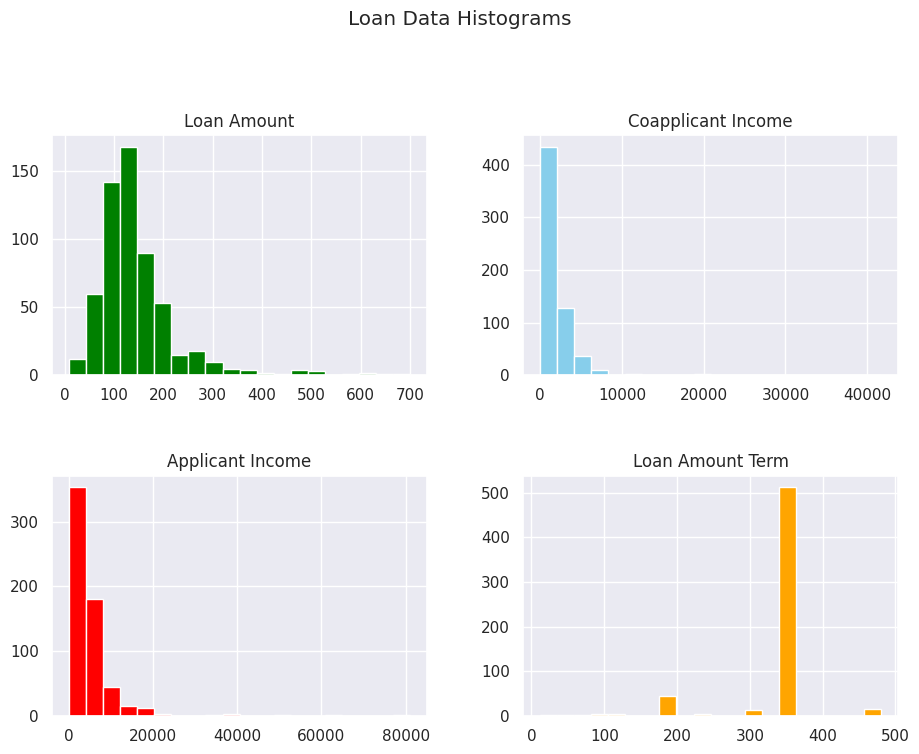

In [ ]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# Create the subplots layout
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms
axs[0, 0].hist(df_train['LoanAmount'], bins=20, color='green')
axs[0, 0].set_title('Loan Amount')

axs[0, 1].hist(df_train['CoapplicantIncome'], bins=20, color='skyblue')
axs[0, 1].set_title('Coapplicant Income')

axs[1, 0].hist(df_train['ApplicantIncome'], bins=20, color='red')
axs[1, 0].set_title('Applicant Income')

axs[1, 1].hist(df_train['Loan_Amount_Term'], bins=20, color='orange')
axs[1, 1].set_title('Loan Amount Term')

# Add overall title and adjust subplot spacing
fig.suptitle('Loan Data Histograms')
fig.tight_layout(pad=3.0)

# Show the plots
plt.show()


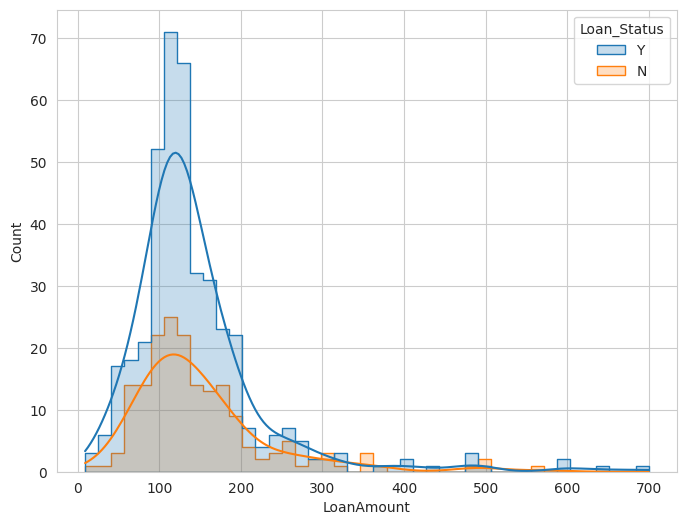

In [ ]:
# Distribution of loan amounts with orange and blue colors
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

# create a histogram plot with different colors for bars and kde line
sns.histplot(data=df_train, x='LoanAmount', hue='Loan_Status', element='step', kde=True)

# set the color of the bars and kde line
sns.set_palette(['#8ec7f2', '#f76f8e'])

# show the plot
plt.show()



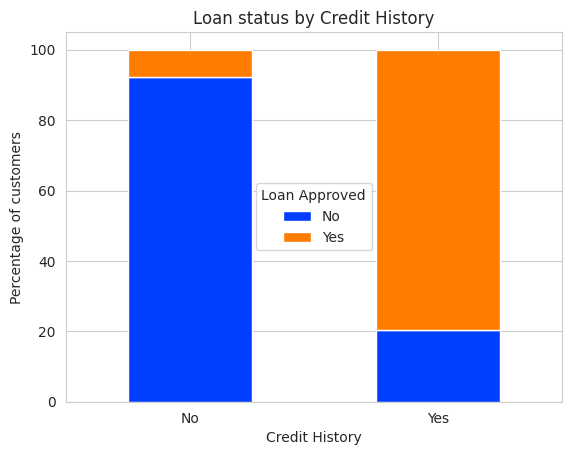

In [ ]:
# Calculate the percentage of loan_amounts for each credit history value
loan_amount_percentages = df_train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True) * 100

# Unstack the series to create a dataframe with credit history as rows and loan status as columns
loan_amount_df = loan_amount_percentages.unstack()

# Create a bar plot of the loan amount percentages for each credit history value
ax = loan_amount_df.plot(kind='bar',stacked=True, color=sns.color_palette('bright'))
ax.set_xlabel('Credit History')
ax.set_ylabel('Percentage of customers')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
ax.set_title('Loan status by Credit History')
# Add legend
plt.legend(title='Loan Approved', labels=['No', 'Yes'], loc=10)

# Display the plot
plt.show()

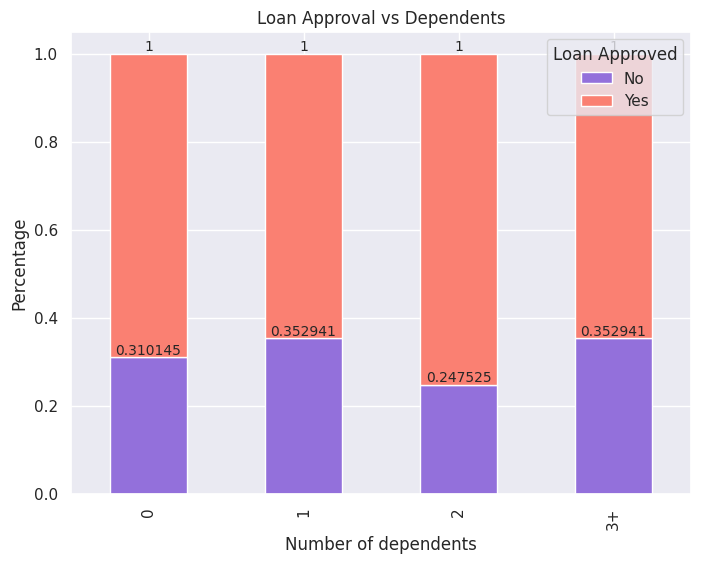

In [ ]:
# Create a crosstab table of dependents and Loan_Status
ct = pd.crosstab(df_train['Dependents'], df_train['Loan_Status'], normalize='index')

# Create a stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#9370DB', '#FA8072'])

# Set the title and axis labels
ax.set_title('Loan Approval vs Dependents')
ax.set_xlabel('Number of dependents')
ax.set_ylabel('Percentage')

# Add a legend
ax.legend(title='Loan Approved', labels=['No', 'Yes'], loc='upper right')

# Add percentage values on the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

# Show the plot
plt.show()


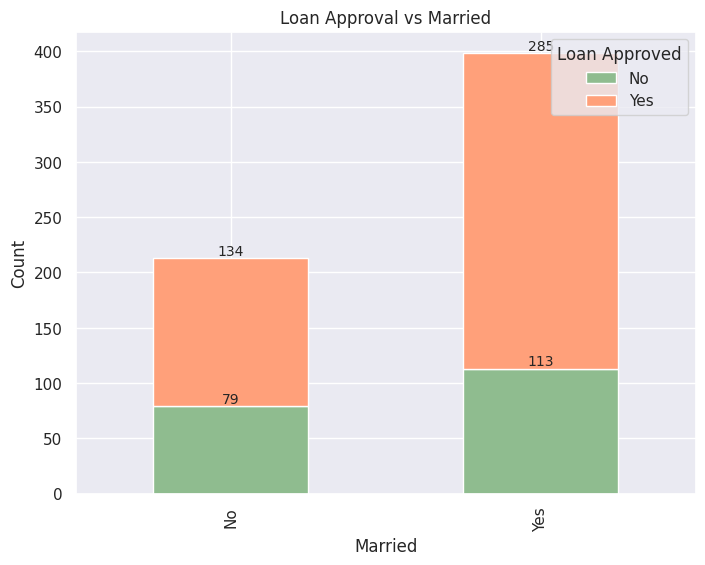

In [ ]:
# Create a crosstab table of Property_Area and Loan_Status
ct = pd.crosstab(df_train['Married'], df_train['Loan_Status'])

# Create a stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#8FBC8F', '#FFA07A'])

# Set the title and axis labels
ax.set_title('Loan Approval vs Married')
ax.set_xlabel('Married')
ax.set_ylabel('Count')

# Add a legend
ax.legend(title='Loan Approved', labels=['No', 'Yes'], loc='upper right')

# Add count values on the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, labels=i.datavalues.astype(int))

# Show the plot
plt.show()


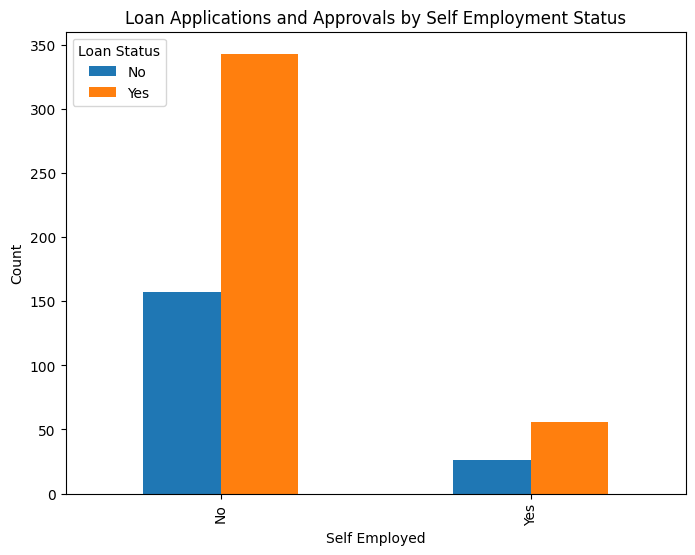

In [ ]:
# Group the data by Self_Employed and Loan_Status and count the number of occurrences
grouped_data = df_train.groupby(['Self_Employed', 'Loan_Status'])['Loan_Status'].count().unstack()

# Create a grouped bar chart
ax = grouped_data.plot(kind='bar', stacked=False, figsize=(8,6))

# Add axis labels and title
ax.set_xlabel('Self Employed')
ax.set_ylabel('Count')
ax.set_title('Loan Applications and Approvals by Self Employment Status')

# Add legend
ax.legend(title='Loan Status', labels=['No', 'Yes'], loc=2)

# Show the plot
plt.show()


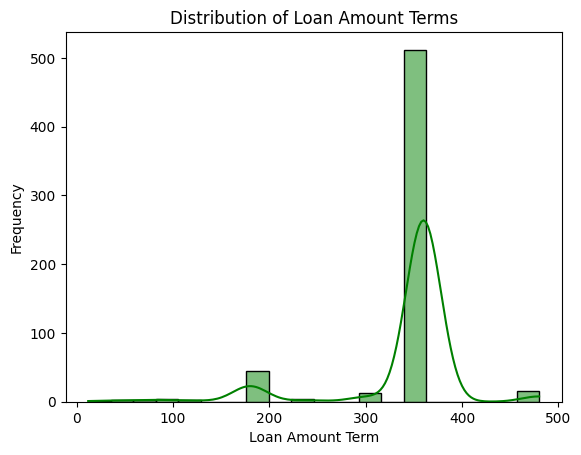

In [ ]:
# Create a histogram of Loan_Amount_Term with density curve
sns.histplot(data=df_train, x='Loan_Amount_Term', bins=20, kde=True, color='green')

# Add axis labels and title
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount Terms')

# Show the plot
plt.show()

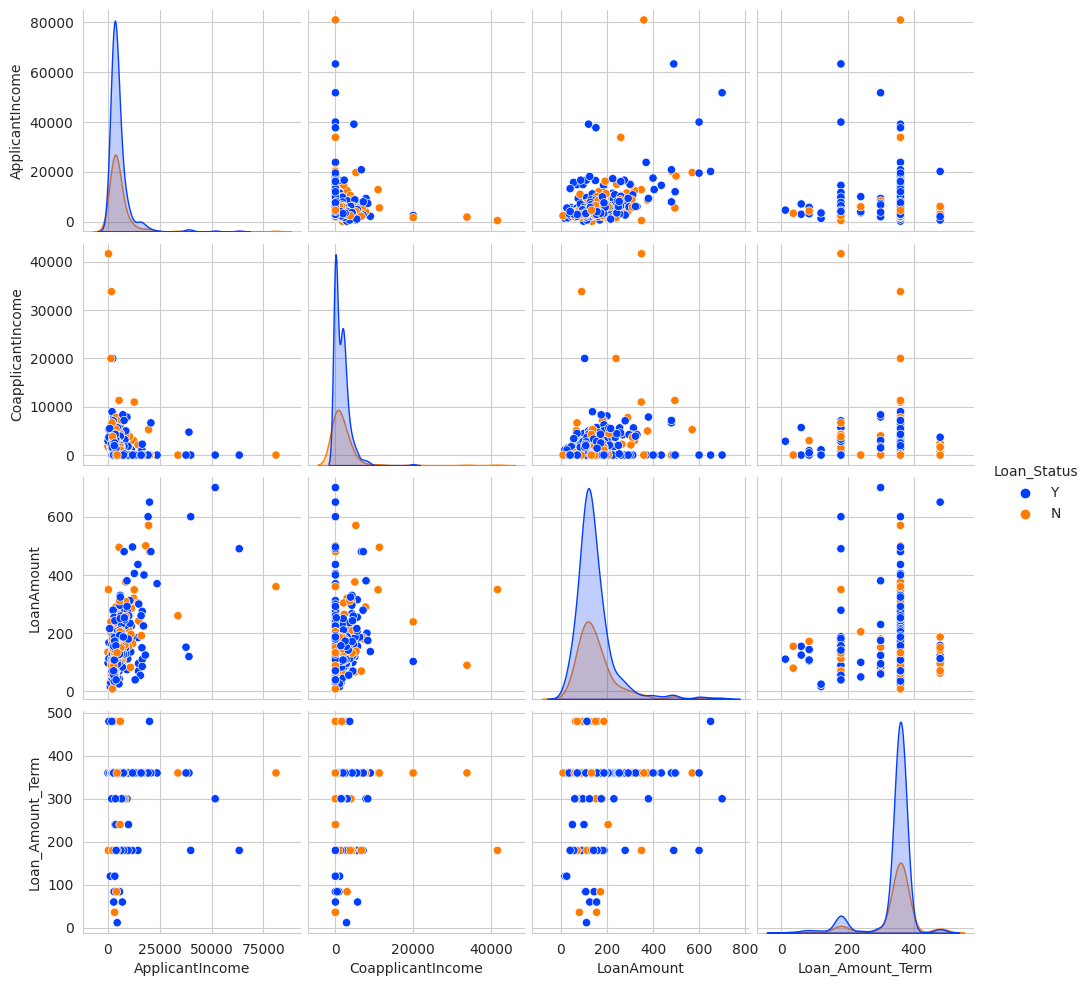

In [ ]:

# Relationship between loan approval and other features
sns.pairplot(data=df_train, vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], hue='Loan_Status', palette='bright')
plt.show()

In [ ]:
#handling null values
imputer = SimpleImputer(strategy='mean')
df_train[['LoanAmount', 'Loan_Amount_Term']] = imputer.fit_transform(df_train[['LoanAmount', 'Loan_Amount_Term']])

imputer = SimpleImputer(strategy='most_frequent')
df_train[['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']] = imputer.fit_transform(df_train[['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [ ]:
#encoding categorical values
enc = LabelEncoder()
for col in df_train.columns:
    if df_train[col].dtype == np.number:
        continue 
    else:
        df_train[col] = enc.fit_transform(df_train[col])

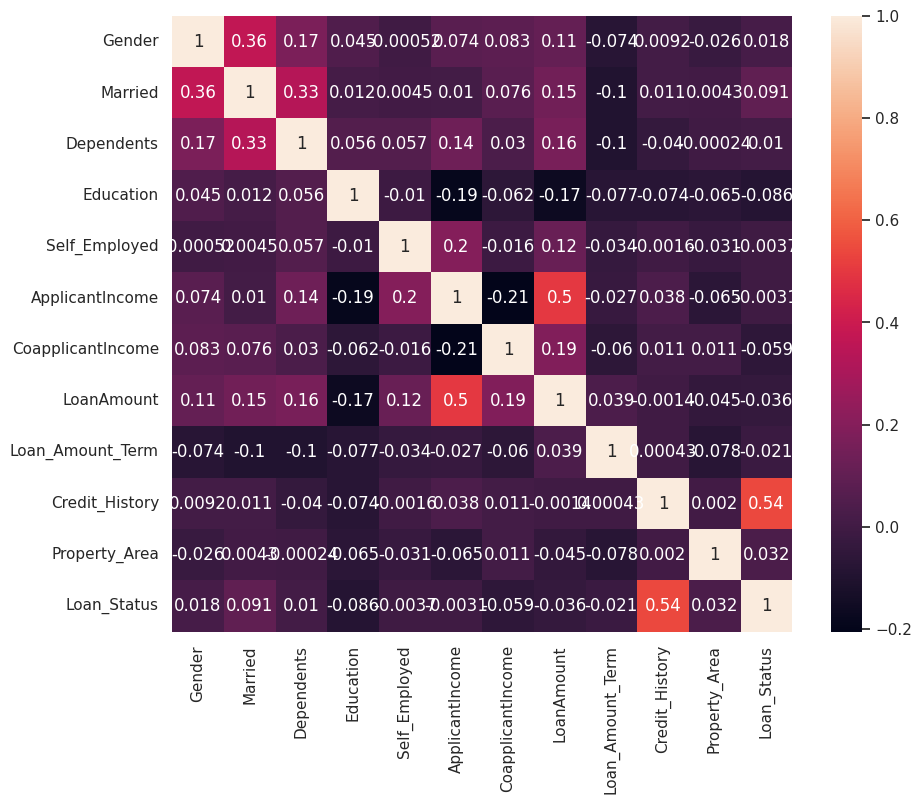

In [ ]:
# Compute the correlation matrix for the dataframe df_train
corr_matrix = df_train.corr()

# Import the seaborn library for data visualization and set the figure size
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Generate a heatmap using the correlation matrix and annotate the values
sn.heatmap(corr_matrix, annot=True)

# Display the heatmap
plt.show()


In [ ]:
# feature extraction:
df_train['Tot_income']= df_train['ApplicantIncome']+ df_train['CoapplicantIncome']
df_train['debt_incomer']=df_train['LoanAmount']/df_train['Tot_income']

In [ ]:
corr_matrix = df_train.corr()
corr_loan = corr_matrix[['Loan_Status']].sort_values(by=['Loan_Status'], ascending=False)
corr_loan

,Loan_Status
Loan_Status,1.000000
Credit_History,0.540556
Married,0.091478
Property_Area,0.032112
Gender,0.017987
Dependents,0.010118
ApplicantIncome,-0.003123
Self_Employed,-0.003700
Loan_Amount_Term,-0.020974
LoanAmount,-0.036416


In [ ]:
#we will drop these created variables as they provide no significance to our dataset
df_train.drop(['Tot_income', 'debt_incomer'], axis=1, inplace=True)

In [ ]:
# Calculate the first and third quartiles of the dataframe
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)

# Calculate the interquartile range (IQR) of the dataframe
IQR = Q3 - Q1

# Remove any rows from the dataframe where any column value is less than Q1 - 1.5*IQR or greater than Q3 + 1.5*IQR
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# Apply the square root function to the 'CoapplicantIncome' column
df_train.CoapplicantIncome = np.sqrt(df_train.CoapplicantIncome)

# Apply the square root function to the 'LoanAmount' column
df_train.LoanAmount = np.sqrt(df_train.LoanAmount)


In [ ]:
# Apply Box-Cox transformation to "ApplicantIncome" column

from scipy.stats import boxcox
income, _ = boxcox(df_train['ApplicantIncome'] + 1)

# Check if any transformed value is -inf
if np.isinf(income).any():
    # If there are -inf values, add a constant to the data before transformation
    income, _ = boxcox(df_train['ApplicantIncome'] + 100)
    # Check if any transformed value is still -inf
    if np.isinf(income).any():
        print('Box-Cox transformation failed to remove skewness.')
    else:
        df_train['ApplicantIncome'] = income
else:
    df_train['ApplicantIncome'] = income


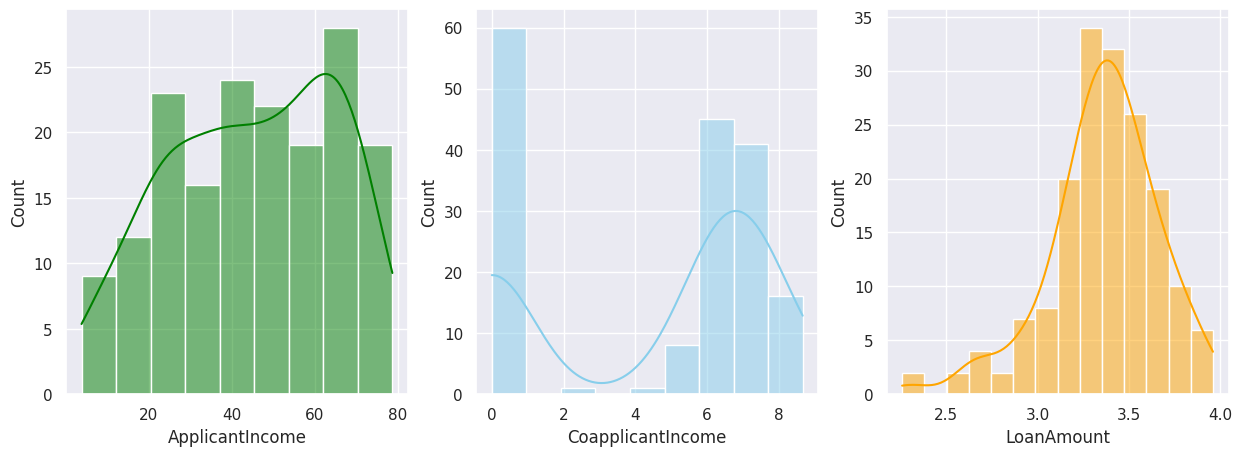

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df_train, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=df_train, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=df_train, x="LoanAmount", kde=True, ax=axs[2], color='orange');

plt.show()

In [ ]:
X = df_train.drop(["Loan_Status"], axis=1)
y = df_train["Loan_Status"]

In [ ]:
# Use SMOTE to oversample the minority class in the dataset represented by X and y
# SMOTE creates synthetic samples of the minority class by interpolating between existing samples
# The resulting dataset will have a balanced class distribution
X, y = SMOTE().fit_resample(X, y)

In [ ]:
# Import the MinMaxScaler class from the scikit-learn preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMaxScaler object and apply it to the input data X
# This scales the features of X so that they fall within the range [0, 1]
X = MinMaxScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Compute the correlation matrix of the dataframe df_train
corr_matrix = df_train.corr()

# Extract the correlation coefficients between each feature and the target variable 'Loan_Status',
# and sort them in descending order
corr_loan = corr_matrix[['Loan_Status']].sort_values(by=['Loan_Status'], ascending=False)

# Display the resulting correlation coefficients
corr_loan


,Loan_Status
Loan_Status,1.000000
Married,0.083858
Dependents,0.059136
CoapplicantIncome,0.058530
Property_Area,0.007003
ApplicantIncome,-0.065485
LoanAmount,-0.078373
Gender,NaN
Education,NaN
Self_Employed,NaN


In [ ]:
#we see that gender, education, self_employed. loan_amout_term and credit_history are not that important, cross validate with other methods to drop the most frequent less significant variable

In [ ]:
X1=df_train.drop(["Loan_Status"], axis=1)
Y1=df_train['Loan_Status']
# using lasso to get important features
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

# Get feature importance
coef = pd.Series(lasso.coef_,index=X1.columns)
imp_coef = coef.sort_values()
imp_coef

LoanAmount          -0.288061
Gender               0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome     -0.000000
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area        0.102803
CoapplicantIncome    0.142215
Married              0.155732
Dependents           0.173864
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_clf = RandomForestClassifier(n_estimators=800, random_state=42)

# Train the classifier on the training data
rf_clf.fit(X_train, y_train)

# Get the feature importances
importances = rf_clf.feature_importances_

# Create a list of (feature, importance) tuples
feature_importances = [(feature, importance) for feature, importance in zip(X1.columns, importances)]

# Sort the list by importance score in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the top 10 features with their importance scores
for feature, importance in feature_importances[:11]:
    print(f"{feature}: {importance:.3f}")

ApplicantIncome: 0.309
LoanAmount: 0.292
CoapplicantIncome: 0.184
Property_Area: 0.082
Dependents: 0.079
Married: 0.054
Gender: 0.000
Education: 0.000
Self_Employed: 0.000
Loan_Amount_Term: 0.000
Credit_History: 0.000


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
lr = LogisticRegression()

# Create an RFE object with 5 features
rfe = RFE(lr, n_features_to_select=5)

# Fit the RFE object to the data
rfe.fit(X, y)

# Print the ranking of the features
print(rfe.ranking_)

[7 1 1 6 5 2 1 1 4 3 1]


In [ ]:
#Feature 0 (Gender): Score 7
#Feature 1 (Married): Score 1
#Feature 2 (Dependents): Score 1
#Feature 3 (Education): Score 6
#Feature 4 (Self_Employed): Score 5
#Feature 5 (ApplicantIncome): Score 2
#Feature 6 (CoapplicantIncome): Score 1
#Feature 7 (LoanAmount): Score 1
#Feature 8 (Loan_Amount_Term): Score 4
#Feature 9 (Credit_History): Score 3
#Feature 10 (Property_Area): Score 1

In [ ]:
#Updating train and test after feature selection

In [ ]:
# Drop columns that are not required for the model
X2 = df_train.drop(columns=['Loan_Status', 'Education', 'Self_Employed', 'Gender'], axis=1)

# Create a target variable y2 that contains the values of the "Loan_Status" column
y2 = df_train["Loan_Status"]

# Perform Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution of the target variable
X2, y2 = SMOTE().fit_resample(X2, y2)

# Apply MinMaxScaler to scale the features to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
X2 = MinMaxScaler().fit_transform(X2)

# Split the data into training and testing sets with a test size of 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [ ]:
def plot_confusion_matrix(conf_mat):
    plt.figure(figsize=(6, 6))
    n = len(conf_mat)
    plt.imshow(conf_mat, cmap='Blues', extent=[-0.5, n-0.5, -0.5, n-0.5])
    for i in range(n):
        for j in range(n):
            plt.text(i, j, conf_mat[n-j-1, i], ha='center', va='center', color='black')
    plt.colorbar()
    plt.xticks(range(n))
    plt.yticks(range(n), range(n-1, -1, -1))
    plt.xlabel('Predicted class', fontsize=14)
    plt.ylabel('True class', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(False)
    plt.show()


##Logistic Regression

Best hyperparameters: {'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation score: 0.6796992481203008
accuracy: 0.704225352112676
precision: 0.7380952380952381
recall: 0.7560975609756098
F1 Score: 0.746987951807229


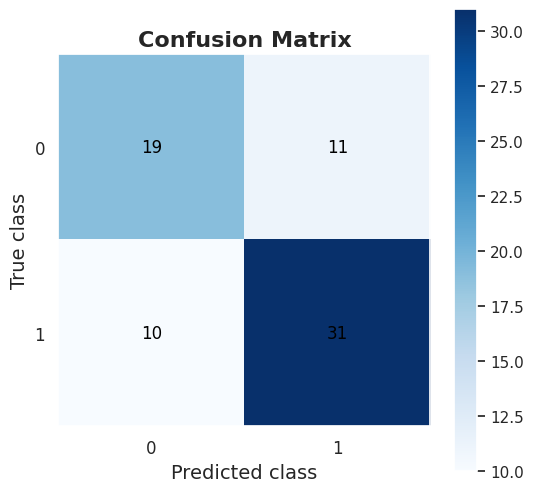

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
np.random.seed(5)

# Define the hyperparameter grid to search over
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

# Create the LogisticRegression estimator
lg = LogisticRegression()

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lg, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Best cross-validation score:', grid_search.best_score_)

# Get the best estimator from the GridSearchCV object
best_lg = grid_search.best_estimator_

# Use the best estimator to make predictions on the test set
y_pred = best_lg.predict(X_test)

# Compute evaluation metrics
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

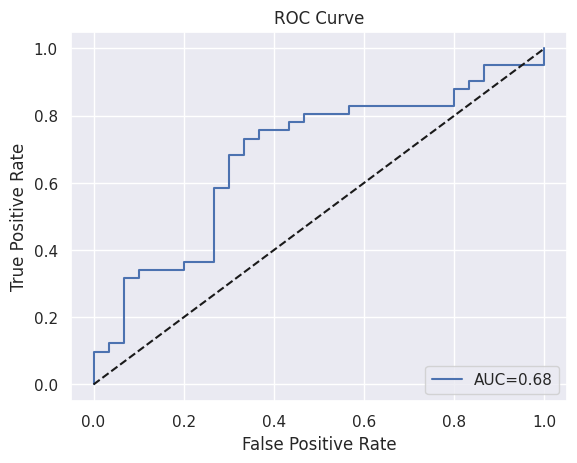

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the test set
y_pred_prob = best_lg.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


##Gaussian Naive Bayes



accuracy 0.6619718309859155
precision 0.7428571428571429
recall 0.6341463414634146
F1 Score 0.6842105263157895


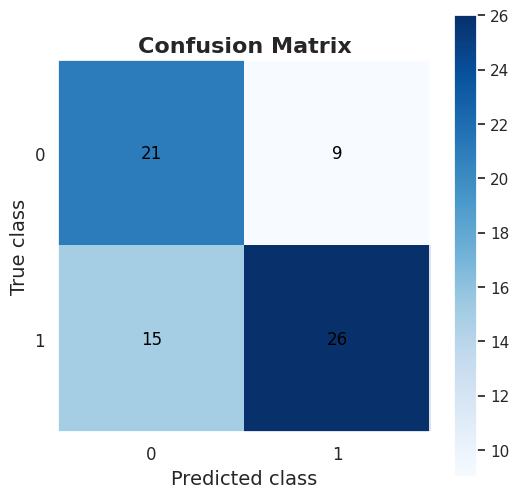

In [ ]:
#apply Gaussian Naive Bayes
nb= GaussianNB();
nb.fit(X_train,y_train)
y_pred_smote= nb.predict(X_test)
# Compute evaluation metrics
print('accuracy', accuracy_score(y_test, y_pred_smote))
print('precision',precision_score(y_test, y_pred_smote))
print('recall', recall_score(y_test, y_pred_smote))
print('F1 Score',f1_score(y_test, y_pred_smote))
plot_confusion_matrix(confusion_matrix(y_test,y_pred_smote))

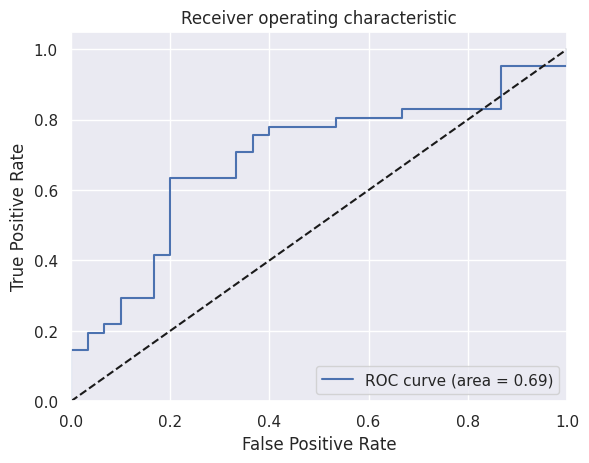

In [ ]:
probas = nb.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
roc_auc = roc_auc_score(y_test, probas[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

##Naive Bayes 

Naive Bayes Results:
Best Parameters: {'alpha': 10}
Accuracy: 0.6901408450704225
Precision: 0.7878787878787878
Recall: 0.6341463414634146
F1 Score: 0.7027027027027027


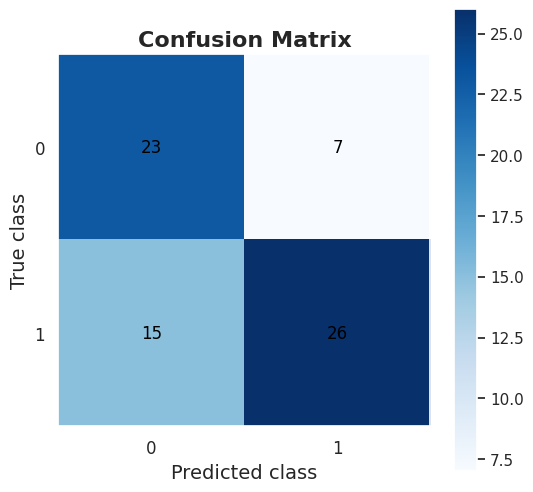

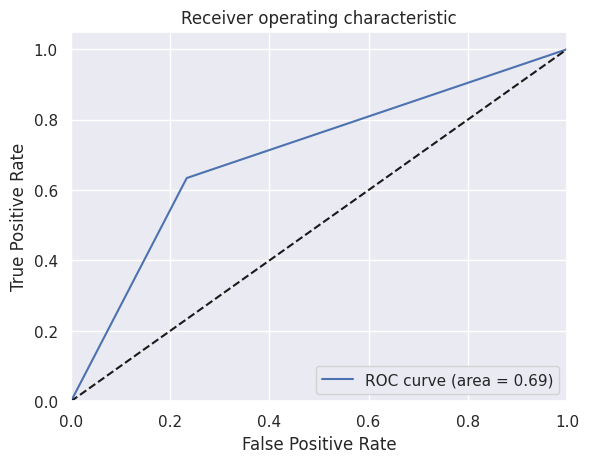

In [ ]:
def train_naive_bayes(X_train, y_train, X_test, y_test):
    model = MultinomialNB()
    params = {'alpha': [0.001,0.01, 0.1, 1, 10,100,1000]}
    clf = GridSearchCV(model, params, cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Naive Bayes Results:')
    print('Best Parameters:', clf.best_params_)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred))

 # Compute the probabilities of positive class
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute the ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")  
    plt.show()
    
train_naive_bayes(X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_prob):
    # Compute the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Compute the area under the ROC curve
    roc_auc = auc(fpr, tpr)

    # Set the figure size and plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

    # Add axis labels and a title
    ax.set_xlabel('False Positive Rate', fontsize=14)
    ax.set_ylabel('True Positive Rate', fontsize=14)
    ax.set_title('Receiver Operating Characteristic', fontsize=16)

    # Add gridlines and style the plot
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc="lower right", fontsize=12)

    # Set the axis limits
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    # Fill area under the curve
    ax.fill_between(fpr, tpr, 0, alpha=0.2, color='blue')

    # Return the plot
    return plt.show()



##K-Neighbors Classifier

KNN Results:
Best Parameters: {'n_neighbors': 3}
Accuracy: 0.7323943661971831
Precision: 0.8055555555555556
Recall: 0.7073170731707317
F1 Score: 0.7532467532467532


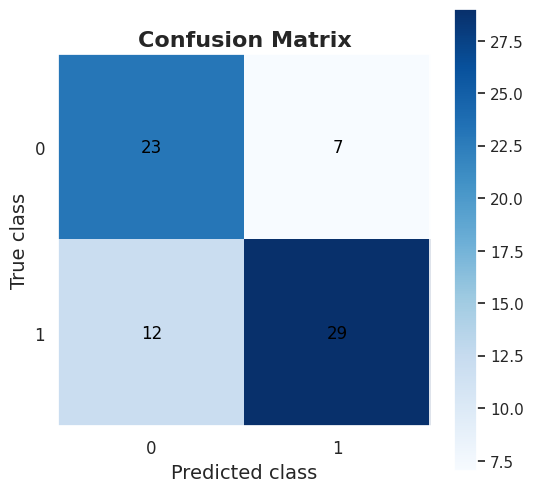

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
model = KNeighborsClassifier()
params = {'n_neighbors': [3, 5, 7, 9]}
clf = GridSearchCV(model, params, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('KNN Results:')
print('Best Parameters:', clf.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

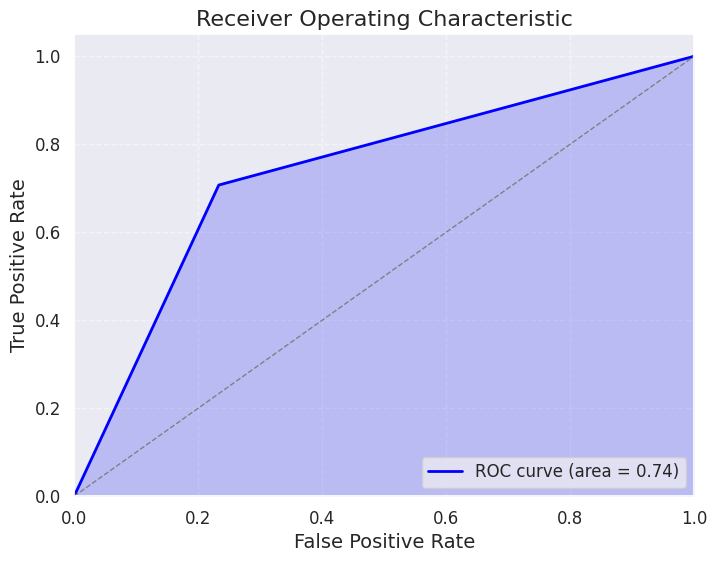

In [ ]:
plot_roc_curve(y_test, y_pred)

##lasso regularization


accuracy 0.6197183098591549
precision 0.609375
recall 0.9512195121951219
F1 Score 0.7428571428571428


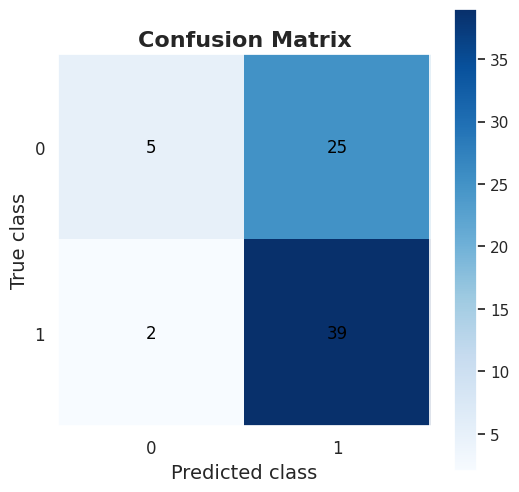

In [ ]:
#lasso regularization
from sklearn.linear_model import SGDClassifier
np.random.seed(42)
sgd_lasso= SGDClassifier(penalty='l1');
sgd_lasso.fit(X_train,y_train)
y_pred_smote= sgd_lasso.predict(X_test)
# Compute evaluation metrics
print('accuracy', accuracy_score(y_test, y_pred_smote))
print('precision',precision_score(y_test, y_pred_smote))
print('recall', recall_score(y_test, y_pred_smote))
print('F1 Score',f1_score(y_test, y_pred_smote))
plot_confusion_matrix(confusion_matrix(y_test,y_pred_smote))


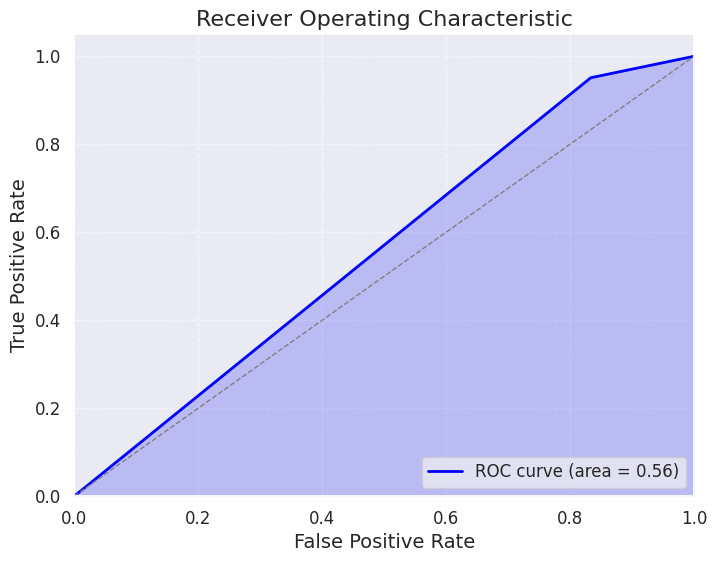

In [ ]:
plot_roc_curve(y_test, y_pred_smote)

##ridge regularization

accuracy 0.6901408450704225
precision 0.7209302325581395
recall 0.7560975609756098
F1 Score 0.7380952380952381


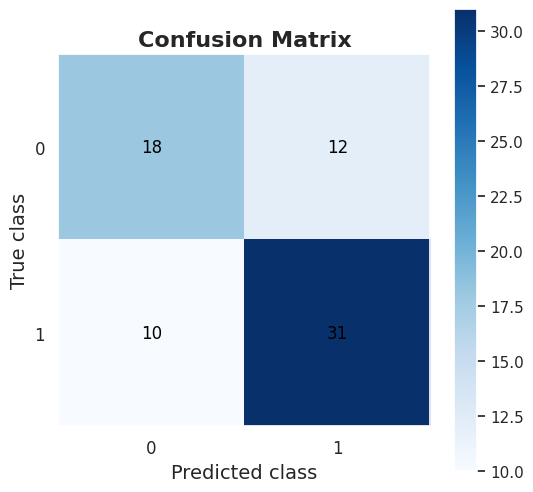

In [ ]:
#ridge regularization
from sklearn.linear_model import SGDClassifier
sgd_lasso= SGDClassifier(penalty='l2');
sgd_lasso.fit(X_train,y_train)
y_pred_smote= sgd_lasso.predict(X_test)
# Compute evaluation metrics
print('accuracy', accuracy_score(y_test, y_pred_smote))
print('precision',precision_score(y_test, y_pred_smote))
print('recall', recall_score(y_test, y_pred_smote))
print('F1 Score',f1_score(y_test, y_pred_smote))
plot_confusion_matrix(confusion_matrix(y_test,y_pred_smote))

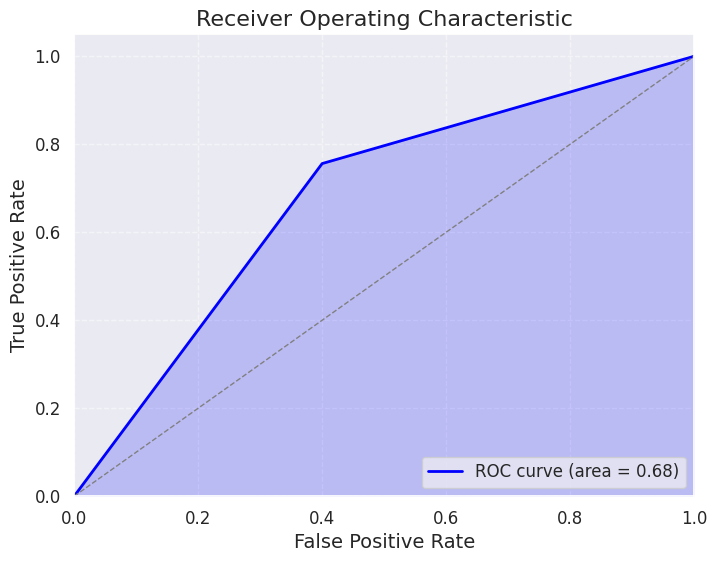

In [ ]:
plot_roc_curve(y_test, y_pred_smote)

##Decision tree classifier

Decision tree classifier using gini

accuracy 0.7464788732394366
precision 0.8108108108108109
recall 0.7317073170731707
F1 Score 0.7692307692307694


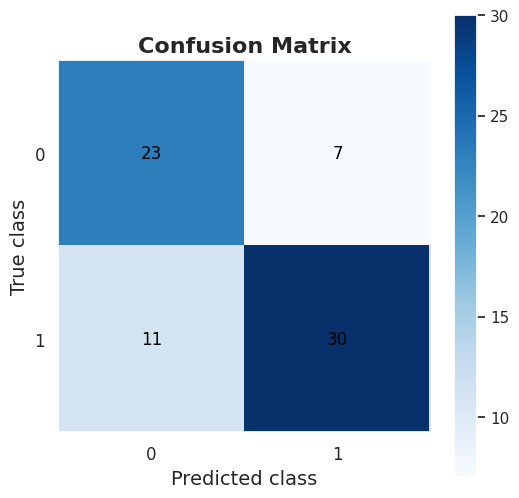

In [ ]:
from sklearn import tree
np.random.seed(42)
#Apply Decision tree classifier using gini
dtc= DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)
y_pred_smote= dtc.predict(X_test)
# Compute evaluation metrics
print('accuracy', accuracy_score(y_test, y_pred_smote))
print('precision',precision_score(y_test, y_pred_smote))
print('recall', recall_score(y_test, y_pred_smote))
print('F1 Score',f1_score(y_test, y_pred_smote))
plot_confusion_matrix(confusion_matrix(y_test,y_pred_smote))
#y_pred_test=dtc.predict(pd.read_csv('loan-test.csv'))


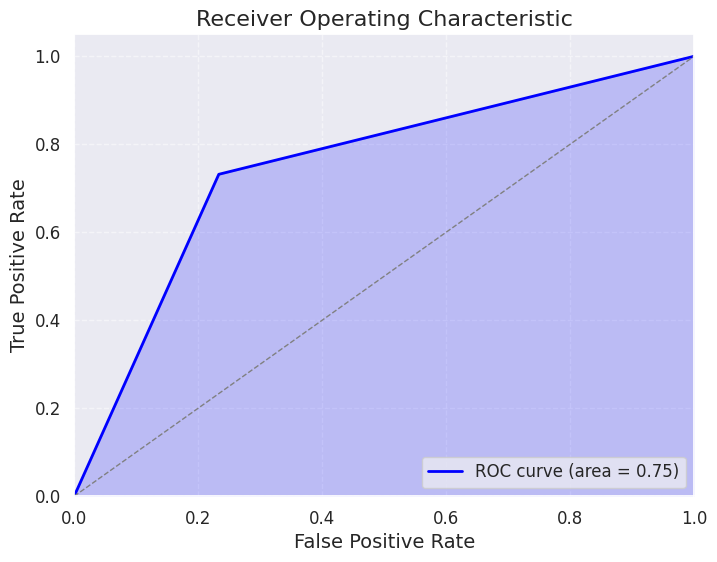

In [ ]:
plot_roc_curve(y_test, y_pred_smote)

Decision tree classifier using entropy

accuracy 0.704225352112676
precision 0.7777777777777778
recall 0.6829268292682927
F1 Score 0.7272727272727273


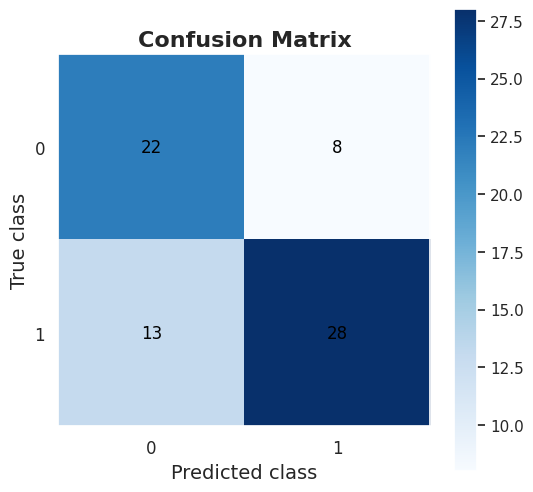

In [ ]:
np.random.seed(42)
dtc2= DecisionTreeClassifier(criterion='entropy')
dtc2.fit(X_train,y_train)
y_pred_smote= dtc2.predict(X_test)
# Compute evaluation metrics
print('accuracy', accuracy_score(y_test, y_pred_smote))
print('precision',precision_score(y_test, y_pred_smote))
print('recall', recall_score(y_test, y_pred_smote))
print('F1 Score',f1_score(y_test, y_pred_smote))
plot_confusion_matrix(confusion_matrix(y_test,y_pred_smote))
#y_pred_test=dtc.predict(pd.read_csv('loan-test.csv'))


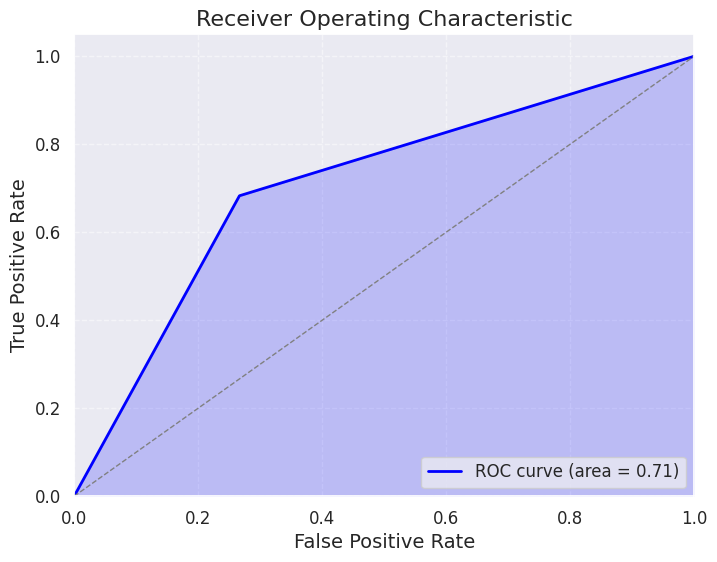

In [ ]:
plot_roc_curve(y_test, y_pred_smote)

Decision tree classifier with many params

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.704225352112676
Precision: 0.7777777777777778
Recall: 0.6829268292682927
F1 Score: 0.7272727272727273


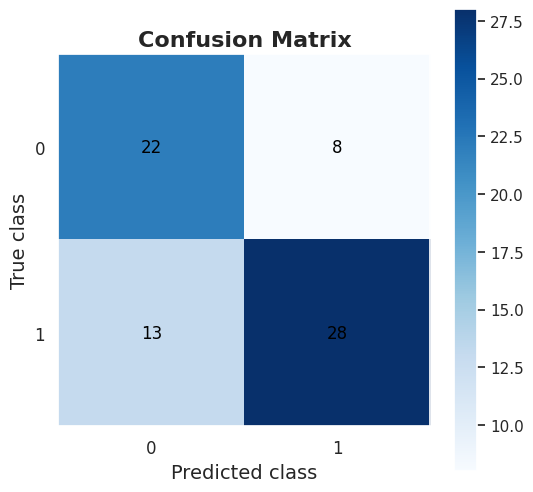

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

# Define the decision tree classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters to search over
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search cross-validation
clf = GridSearchCV(dtc, params, cv=5)
clf.fit(X_train, y_train)

# Get the best parameters and evaluate the model
dtc_best = clf.best_estimator_
y_pred = dtc_best.predict(X_test)

# Compute evaluation metrics
print('Best Parameters:', clf.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))



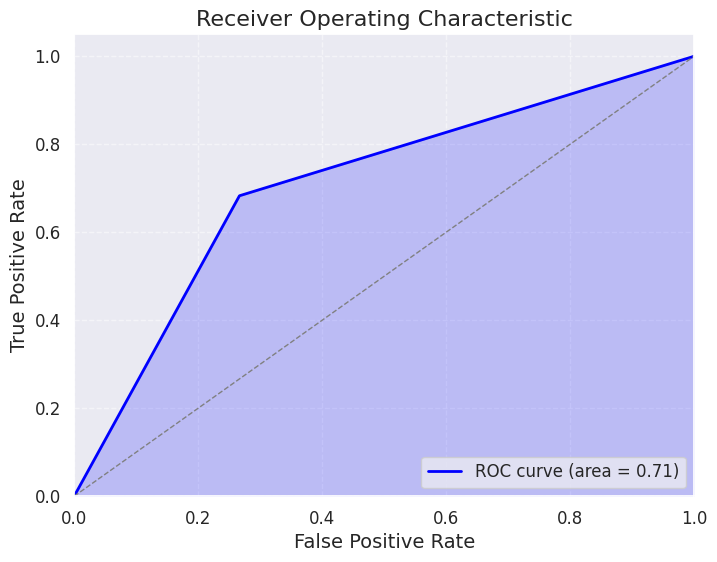

In [ ]:
plot_roc_curve(y_test, y_pred)

Decision tree classifier with max_depth=3 figure 

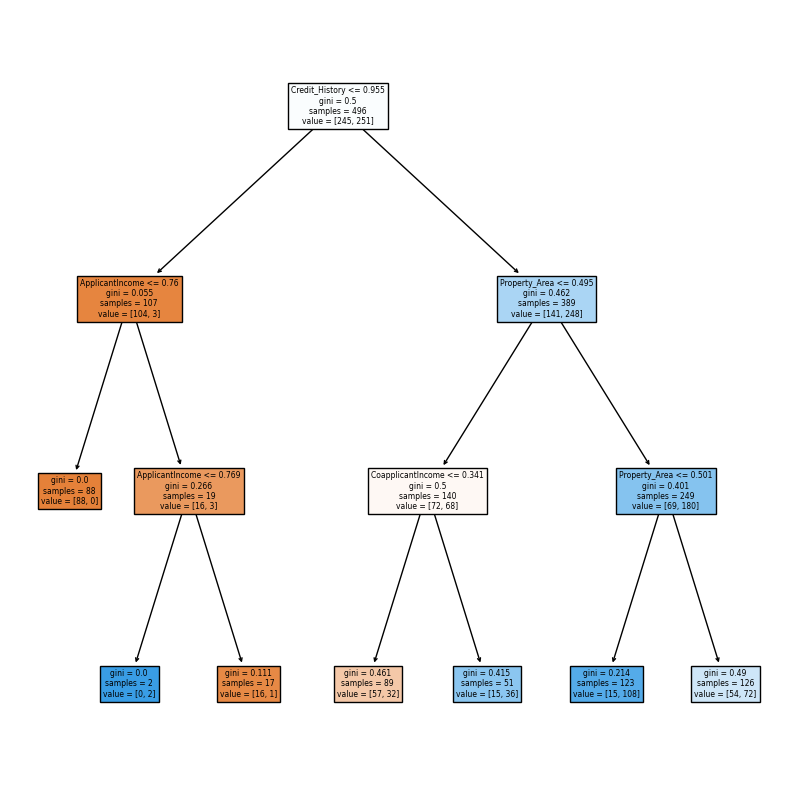

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(dtc1,feature_names=feature_names,filled=True)
plt.savefig('tree.pdf')

##Ensemble

##Voting Classifier with hard voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)

clf1=LogisticRegression()
clf2=KNeighborsClassifier()
clf3=DecisionTreeClassifier()
ensemble=VotingClassifier(estimators=[('log',clf1),('knn',clf2),('dt',clf3)],voting='hard')
names=['Logistic Regression','KNN','Decision Tree','Ensemble(Hard Voting)']
classifiers=[clf1,clf2,clf3,ensemble]
for clf,name in zip(classifiers,names):
    scores=cross_val_score(clf,X_train,y_train,cv=5)
    print('Accuracy ',name,':',scores.mean())

Accuracy  Logistic Regression : 0.6796992481203008
Accuracy  KNN : 0.6938596491228071
Accuracy  Decision Tree : 0.7367794486215539
Accuracy  Ensemble(Hard Voting) : 0.6974310776942356


##Voting Classifier with soft voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
ensemble1=VotingClassifier(estimators=[('log',clf1),('knn',clf2),('dt',clf3)],voting='soft')
names=['Logistic Regression','KNN','Decision Tree','Ensemble(Soft Voting)']
classifiers=[clf1,clf2,clf3,ensemble1]
for clf,name in zip(classifiers,names):
    scores=cross_val_score(clf,X_train,y_train,cv=5)
    print('Accuracy ',name,':',scores.mean())

Accuracy  Logistic Regression : 0.6796992481203008
Accuracy  KNN : 0.6938596491228071
Accuracy  Decision Tree : 0.7367794486215539
Accuracy  Ensemble(Soft Voting) : 0.7260651629072682


##Bagging Classifier

Bagging Classifier Results:
Best Parameters: {'n_estimators': 1000}
Accuracy: 0.7605633802816901
Precision: 0.8333333333333334
Recall: 0.7317073170731707
F1 Score: 0.7792207792207793


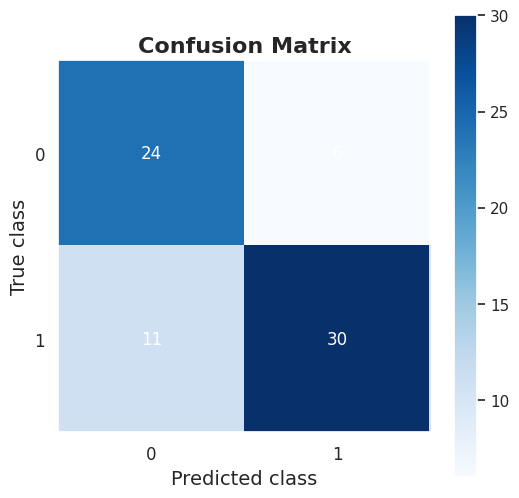

In [ ]:
from sklearn.ensemble import BaggingClassifier
np.random.seed(42)
bag_clf = BaggingClassifier(clf3, max_samples=.25, n_jobs=-1)
params = {'n_estimators': [200, 400, 600, 800, 1000]}
clf = GridSearchCV(bag_clf, params, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Bagging Classifier Results:')
print('Best Parameters:', clf.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))



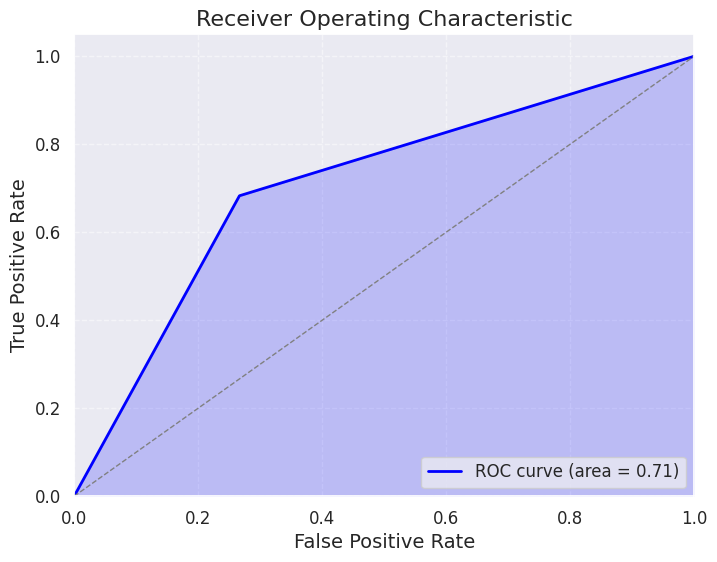

In [ ]:
plot_roc_curve(y_test, y_pred)

##Random Forest Classifier

Random Forest Classifier Results:
Best Parameters: {'n_estimators': 1000}
Accuracy: 0.8450704225352113
Precision: 0.875
Recall: 0.8536585365853658
F1 Score: 0.8641975308641976


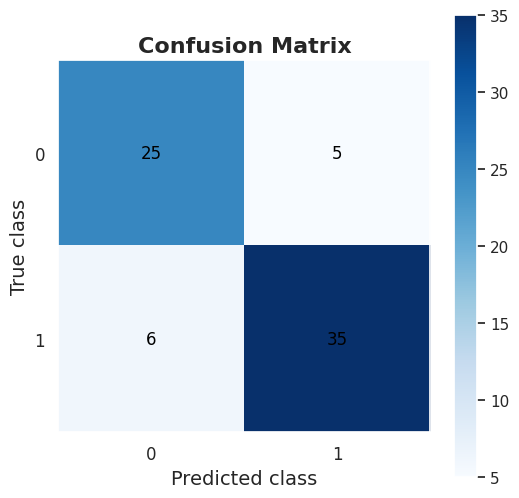

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

# Define the random forest classifier and the parameter grid
rf_clf = RandomForestClassifier(n_jobs=-1)
params = {'n_estimators': [200,400,600,800,1000,1200]}

# Perform grid search on the training data
clf = GridSearchCV(rf_clf, params, cv=5)
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Compute evaluation metrics
print('Random Forest Classifier Results:')
print('Best Parameters:', clf.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))


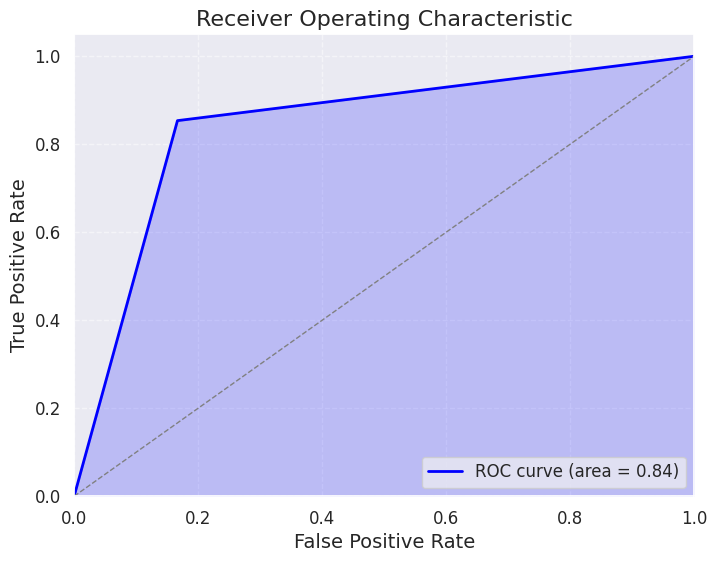

In [ ]:
plot_roc_curve(y_test, y_pred)

##Extra Tree Classifier

Extra Trees Classifier Results:
Best Parameters: {'n_estimators': 1200}
Accuracy: 0.8169014084507042
Precision: 0.85
Recall: 0.8292682926829268
F1 Score: 0.8395061728395061


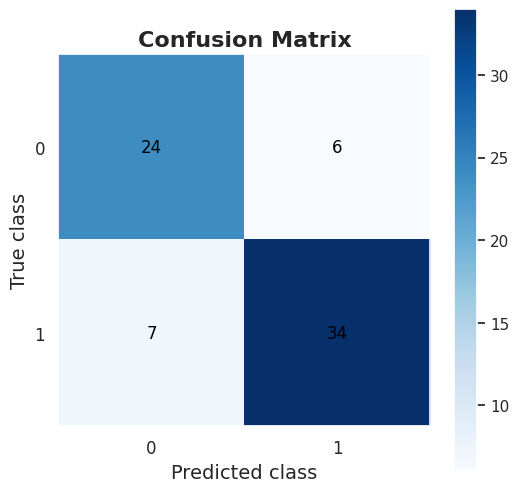

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)
et_clf = ExtraTreesClassifier(n_jobs=-1)
params = {'n_estimators': [200,400,600,800,1000,1200]}
clf = GridSearchCV(et_clf, params, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Extra Trees Classifier Results:')
print('Best Parameters:', clf.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

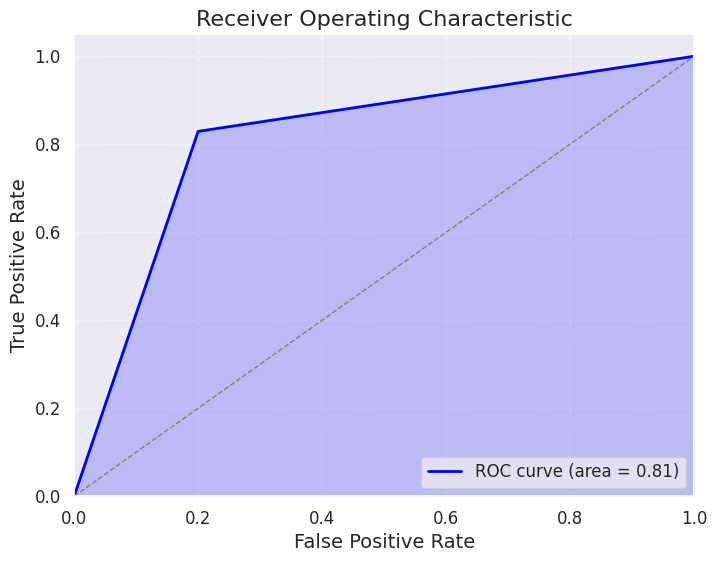

In [ ]:
plot_roc_curve(y_test, y_pred)

##AdaBoost Classifier

AdaBoost Results:
Best Parameters: {'n_estimators': 400}
Accuracy: 0.676056338028169
Precision: 0.75
Recall: 0.6585365853658537
F1 Score: 0.7012987012987012


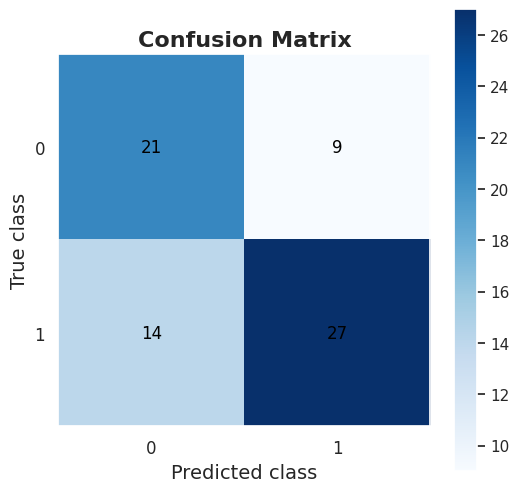

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
np.random.seed(42)
ab_clf = AdaBoostClassifier()
params = {'n_estimators': [200,400,600,800,1000,1200]}
clf = GridSearchCV(ab_clf, params, cv=5)
clf.fit(X_train, y_train)

y_pred1 = clf.predict(X_test)
print('AdaBoost Results:')
print('Best Parameters:', clf.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1))
print('Recall:', recall_score(y_test, y_pred1))
print('F1 Score:', f1_score(y_test, y_pred1))

plot_confusion_matrix(confusion_matrix(y_test,y_pred1))


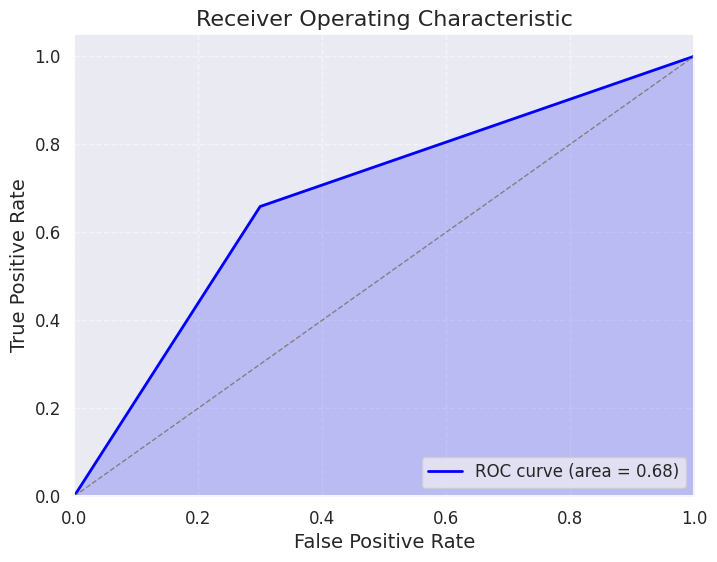

In [ ]:
plot_roc_curve(y_test, y_pred1)

##Gradient Boosting Classifier

GradientBoost Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000}
Accuracy: 0.8309859154929577
Precision: 0.9142857142857143
Recall: 0.7804878048780488
F1 Score: 0.8421052631578947


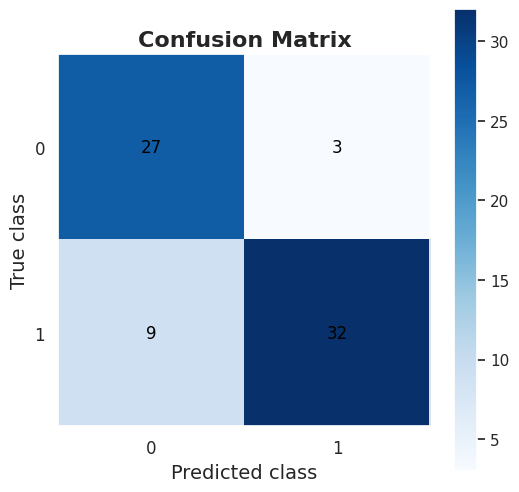

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)
gb_clf = GradientBoostingClassifier()
params = {'n_estimators': [200,400,600,800,1000,1200],
          'learning_rate': [.1,1,10],
          'max_depth': [2, 4, 6,8]}
clf = GridSearchCV(gb_clf, params, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('GradientBoost Results:')
print('Best Parameters:', clf.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

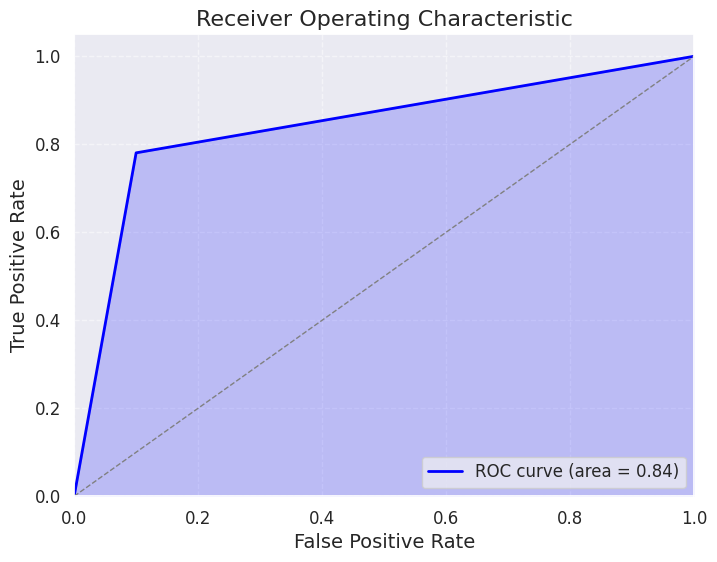

In [ ]:
plot_roc_curve(y_test, y_pred)

##XGBoost

XGBoost Results:
Best Parameters: {'n_estimators': 600}
Accuracy: 0.8309859154929577
Precision: 0.8717948717948718
Recall: 0.8292682926829268
F1 Score: 0.8500000000000001


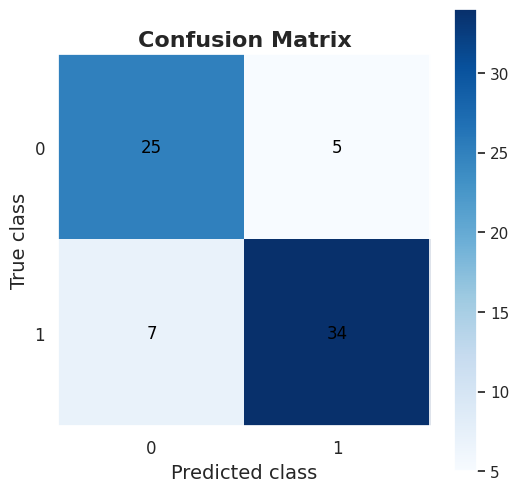

In [ ]:
import xgboost as xgb
np.random.seed(42)
xgb_clf = xgb.XGBClassifier()
params = {'n_estimators': [200,400,600,800,1000,1200,1400,1600,1800,2000,2200]}
clf = GridSearchCV(xgb_clf, params, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('XGBoost Results:')
print('Best Parameters:', clf.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

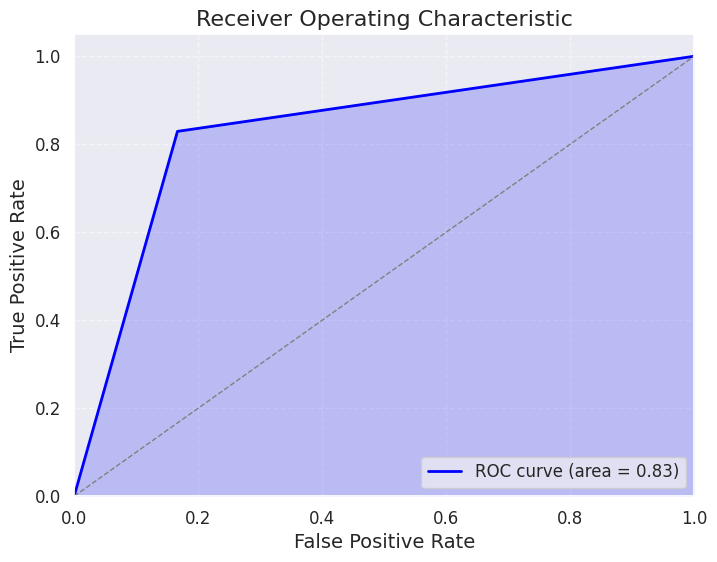

In [ ]:
plot_roc_curve(y_test, y_pred)

##Support Vector Machines

SVC Results:
Best Parameters: {'C': 10000, 'kernel': 'rbf'}
Accuracy: 0.7746478873239436
Precision: 0.8205128205128205
Recall: 0.7804878048780488
F1 Score: 0.8


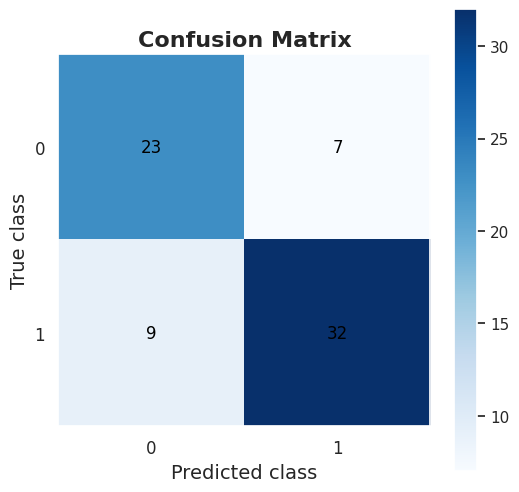

In [ ]:
from sklearn.svm import SVC
np.random.seed(42)
svc_clf = SVC()
params = {'C': [1,10,100,1000,10000], 'kernel': ['sigmoid', 'linear', 'rbf', 'poly']}
clf = GridSearchCV(svc_clf, params, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('SVC Results:')
print('Best Parameters:', clf.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

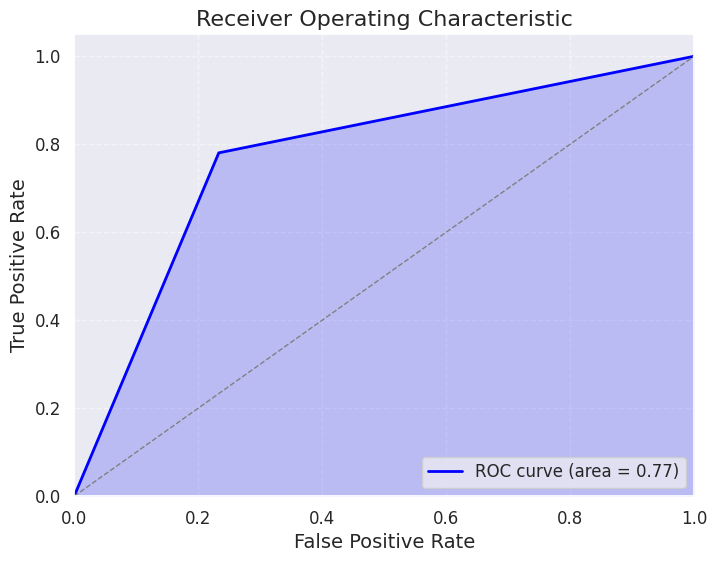

In [ ]:
plot_roc_curve (y_test, y_pred)

##Perceptron

Perceptron Results:
Accuracy: 0.6056338028169014
Precision: 0.7241379310344828
Recall: 0.5121951219512195
F1 Score: 0.6000000000000001


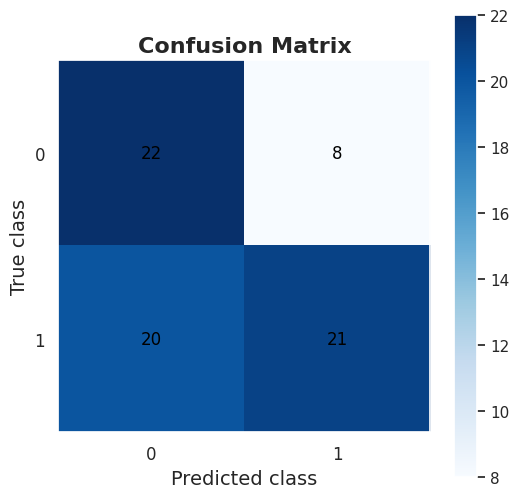

In [ ]:
from sklearn.linear_model import Perceptron
np.random.seed(42)
per=Perceptron(tol=1e-3,random_state=0)
per.fit(X_train,y_train)
y_pred = per.predict(X_test)
print('Perceptron Results:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

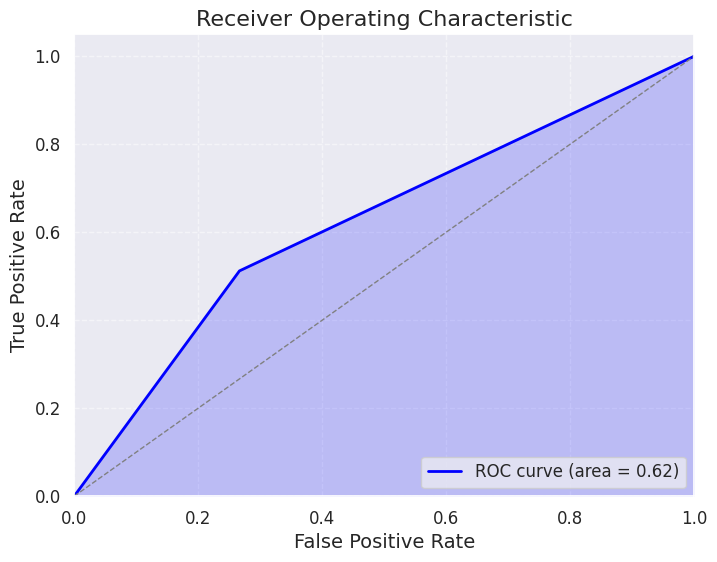

In [ ]:
plot_roc_curve(y_test, y_pred)

##Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(250,),early_stopping=True,verbose=True)
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.69488893
Validation score: 0.586207
Iteration 2, loss = 0.68969339
Validation score: 0.551724
Iteration 3, loss = 0.68419661
Validation score: 0.620690
Iteration 4, loss = 0.67984095
Validation score: 0.655172
Iteration 5, loss = 0.67527126
Validation score: 0.655172
Iteration 6, loss = 0.67121790
Validation score: 0.655172
Iteration 7, loss = 0.66677874
Validation score: 0.620690
Iteration 8, loss = 0.66304066
Validation score: 0.620690
Iteration 9, loss = 0.65922821
Validation score: 0.620690
Iteration 10, loss = 0.65548338
Validation score: 0.620690
Iteration 11, loss = 0.65218504
Validation score: 0.620690
Iteration 12, loss = 0.64886735
Validation score: 0.620690
Iteration 13, loss = 0.64594074
Validation score: 0.620690
Iteration 14, loss = 0.64401185
Validation score: 0.620690
Iteration 15, loss = 0.64087412
Validation score: 0.620690
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, hidden_layer_sizes=(250,), verbose=True)

##Deep Learning

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Activation


In [ ]:
...
# define the keras model
model = Sequential()
model.add(Dense(128, input_shape=(11,), activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# Compile the model and calculate its accuracy:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Print a summary of the Keras model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,937
Trainable params: 5,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_test,y_test))

Epoch 1/20


ValueError: ignored

In [ ]:

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7742
Accuracy: 77.42


In [ ]:
#to test on sample loan-test.csv file
imputer = SimpleImputer(strategy='mean')
df_test[['LoanAmount', 'Loan_Amount_Term']] = imputer.fit_transform(df_test[['LoanAmount', 'Loan_Amount_Term']])

imputer = SimpleImputer(strategy='most_frequent')
df_test[['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']] = imputer.fit_transform(df_test[['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']])
df_test=df_test.loc[:,df_test.columns!='Loan_ID']
enc = LabelEncoder()
for col in df_test.columns:
    if df_test[col].dtype == np.number:
        continue 
    else:
        df_test[col] = enc.fit_transform(df_test[col])
y_testing_pred= dtc.predict(df_test)
df_test['Loan_Status']=y_testing_pred

ValueError: ignored